In [2]:
%matplotlib inline

## Filtering and restoration

### removing small grayscale objects with top hat filter

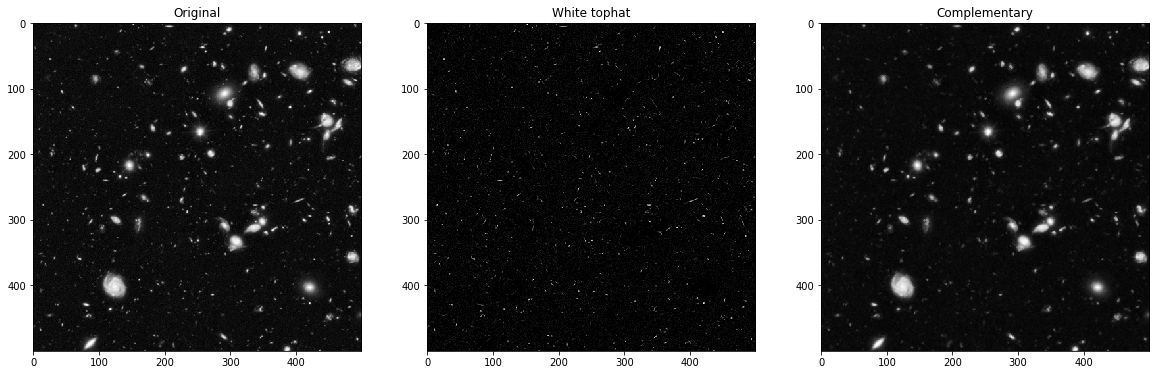

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import color, morphology

image = color.rgb2gray(data.hubble_deep_field())[:500, :500]

selem =  morphology.disk(1)
res = morphology.white_tophat(image, selem)

fig, ax = plt.subplots(ncols=3, figsize=(20, 8))
ax[0].set_title('Original')
ax[0].imshow(image, cmap='gray')
ax[1].set_title('White tophat')
ax[1].imshow(res, cmap='gray')
ax[2].set_title('Complementary')
ax[2].imshow(image - res, cmap='gray')

plt.show()

### hysteresis thresholding

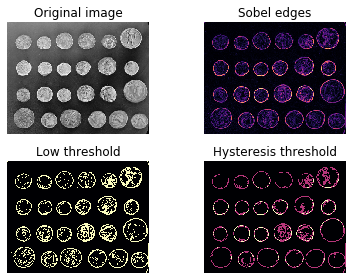

In [4]:
import matplotlib.pyplot as plt
from skimage import data, filters

fig, ax = plt.subplots(nrows=2, ncols=2)

image = data.coins()
edges = filters.sobel(image)

low = 0.1
high = 0.35

lowt = (edges > low).astype(int)
hight = (edges > high).astype(int)
hyst = filters.apply_hysteresis_threshold(edges, low, high)

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(edges, cmap='magma')
ax[0, 1].set_title('Sobel edges')

ax[1, 0].imshow(lowt, cmap='magma')
ax[1, 0].set_title('Low threshold')

ax[1, 1].imshow(hight + hyst, cmap='magma')
ax[1, 1].set_title('Hysteresis threshold')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()

### image deconvolution

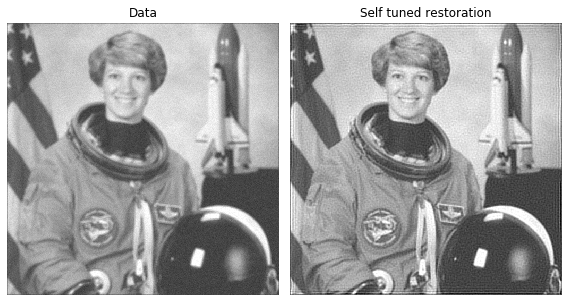

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration

astro = color.rgb2gray(data.astronaut())
from scipy.signal import convolve2d as conv2
psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
astro += 0.1 * astro.std() * np.random.standard_normal(astro.shape)

deconvolved, _ = restoration.unsupervised_wiener(astro, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0].imshow(astro, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(deconvolved)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

fig.tight_layout()
plt.show()

### window functions

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft2, fftshift
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.data import astronaut
from skimage.filters import window

image = img_as_float(rgb2gray(astronaut()))

wimage = image * window('hann', image.shape)

image_f = np.abs(fftshift(fft2(image)))
wimage_f = np.abs(fftshift(fft2(wimage)))

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Original image")
ax[0].imshow(image, cmap='gray')
ax[1].set_title("Windowed image")
ax[1].imshow(wimage, cmap='gray')
ax[2].set_title("Original FFT (frequency)")
ax[2].imshow(np.log(image_f), cmap='magma')
ax[3].set_title("Window + FFT (frequency)")
ax[3].imshow(np.log(wimage_f), cmap='magma')
plt.show()

ImportError: cannot import name 'window'

### mean filters

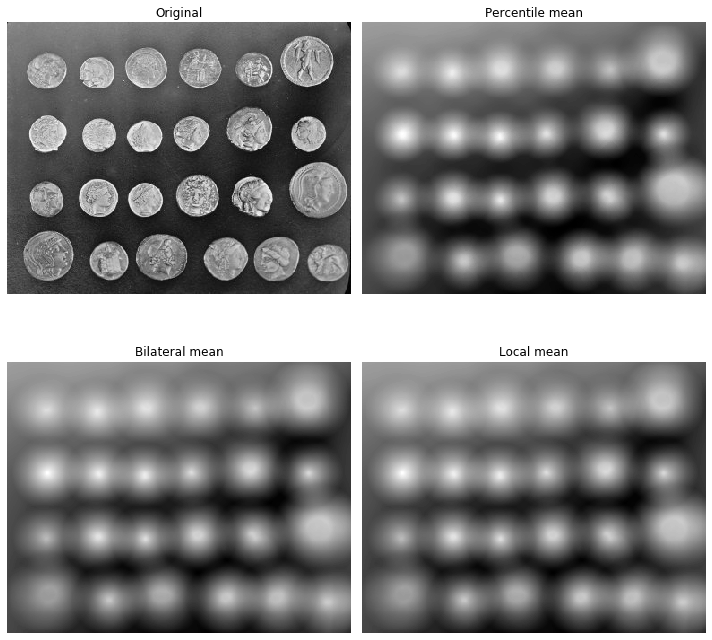

In [6]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.morphology import disk
from skimage.filters import rank


image = data.coins()
selem = disk(20)

percentile_result = rank.mean_percentile(image, selem=selem, p0=.1, p1=.9)
bilateral_result = rank.mean_bilateral(image, selem=selem, s0=500, s1=500)
normal_result = rank.mean(image, selem=selem)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)
ax = axes.ravel()

titles = ['Original', 'Percentile mean', 'Bilateral mean', 'Local mean']
imgs = [image, percentile_result, bilateral_result, normal_result]
for n in range(0, len(imgs)):
    ax[n].imshow(imgs[n], cmap=plt.cm.gray)
    ax[n].set_title(titles[n])
    ax[n].axis('off')

plt.tight_layout()
plt.show()

### unsharp masking

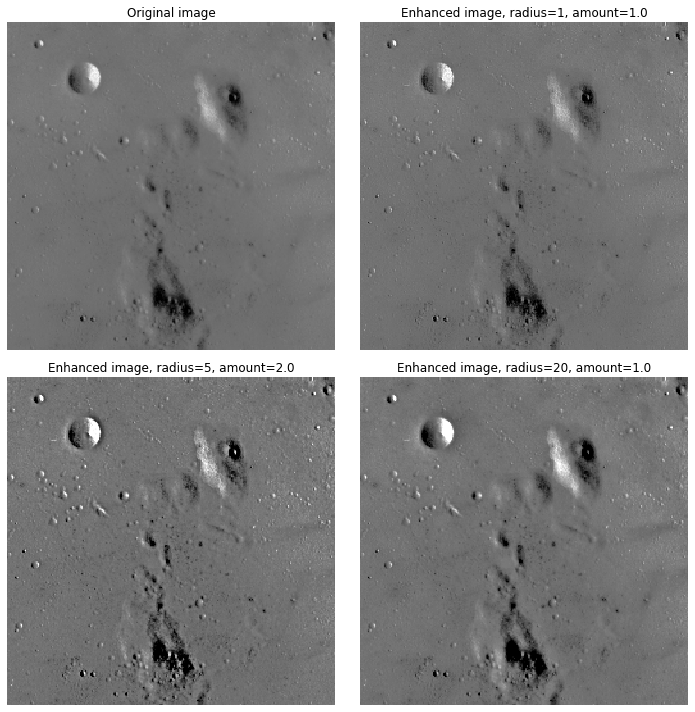

In [8]:
from skimage import data
from skimage.filters import unsharp_mask
import matplotlib.pyplot as plt

image = data.moon()
result_1 = unsharp_mask(image, radius=1, amount=1)
result_2 = unsharp_mask(image, radius=5, amount=2)
result_3 = unsharp_mask(image, radius=20, amount=1)

fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()


### image deconvolution

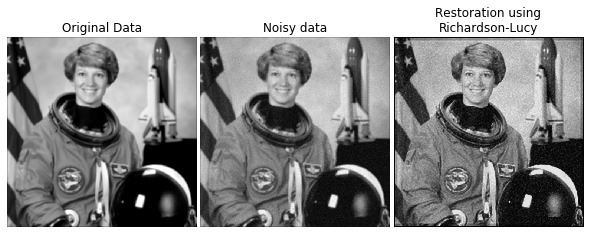

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration

astro = color.rgb2gray(data.astronaut())

psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro.copy()
astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()


### inpainting

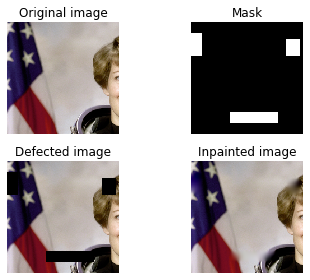

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.restoration import inpaint

image_orig = data.astronaut()[0:200, 0:200]

# Create mask with three defect regions: left, middle, right respectively
mask = np.zeros(image_orig.shape[:-1])
mask[20:60, 0:20] = 1
mask[160:180, 70:155] = 1
mask[30:60, 170:195] = 1

# Defect image over the same region in each color channel
image_defect = image_orig.copy()
for layer in range(image_defect.shape[-1]):
    image_defect[np.where(mask)] = 0

image_result = inpaint.inpaint_biharmonic(image_defect, mask,
                                          multichannel=True)

fig, axes = plt.subplots(ncols=2, nrows=2)
ax = axes.ravel()

ax[0].set_title('Original image')
ax[0].imshow(image_orig)

ax[1].set_title('Mask')
ax[1].imshow(mask, cmap=plt.cm.gray)

ax[2].set_title('Defected image')
ax[2].imshow(image_defect)

ax[3].set_title('Inpainted image')
ax[3].imshow(image_result)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()


### entropy

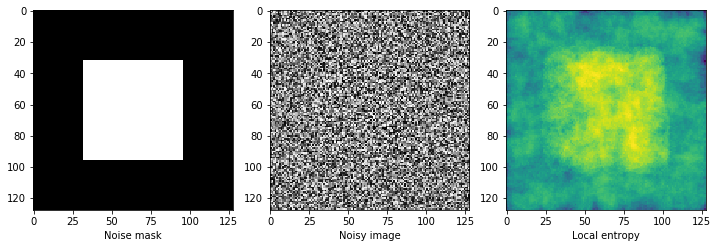

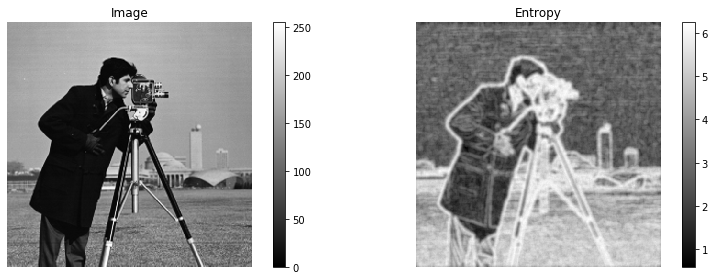

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk

# First example: object detection.

noise_mask = np.full((128, 128), 28, dtype=np.uint8)
noise_mask[32:-32, 32:-32] = 30

noise = (noise_mask * np.random.random(noise_mask.shape) - 0.5 *
         noise_mask).astype(np.uint8)
img = noise + 128

entr_img = entropy(img, disk(10))

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

ax0.imshow(noise_mask, cmap='gray')
ax0.set_xlabel("Noise mask")
ax1.imshow(img, cmap='gray')
ax1.set_xlabel("Noisy image")
ax2.imshow(entr_img, cmap='viridis')
ax2.set_xlabel("Local entropy")

fig.tight_layout()

# Second example: texture detection.

image = img_as_ubyte(data.camera())

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4),
                               sharex=True, sharey=True)

img0 = ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title("Image")
ax0.axis("off")
fig.colorbar(img0, ax=ax0)

img1 = ax1.imshow(entropy(image, disk(5)), cmap='gray')
ax1.set_title("Entropy")
ax1.axis("off")
fig.colorbar(img1, ax=ax1)

fig.tight_layout()

plt.show()


### denoising

Estimated Gaussian noise standard deviation = 0.1497288280771251


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


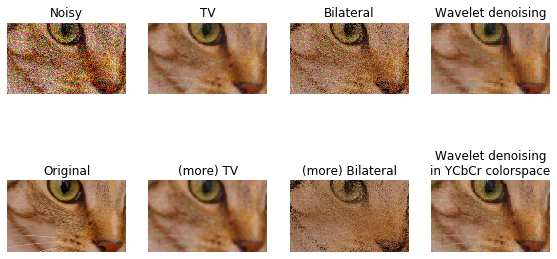

In [12]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise


original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f"Estimated Gaussian noise standard deviation = {sigma_est}")

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, multichannel=True))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15,
                multichannel=True))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')
ax[0, 3].imshow(denoise_wavelet(noisy, multichannel=True, rescale_sigma=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[1, 1].imshow(denoise_tv_chambolle(noisy, weight=0.2, multichannel=True))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')
ax[1, 2].imshow(denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15,
                multichannel=True))
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')
ax[1, 3].imshow(denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                rescale_sigma=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()


### shift-invariant wavelet denoising

/home/bjpcjp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: The optional dask dependency is not installed. The number of workers is set to 1. To silence this warning, install dask or explicitly set `num_workers=1` when calling the `cycle_spin` function
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


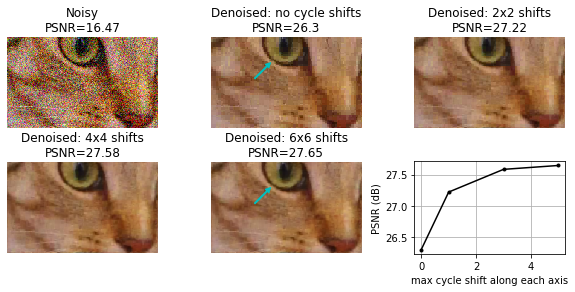

In [13]:
import matplotlib.pyplot as plt

from skimage.restoration import denoise_wavelet, cycle_spin
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio


original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 4),
                       sharex=False, sharey=False)
ax = ax.ravel()

psnr_noisy = peak_signal_noise_ratio(original, noisy)
ax[0].imshow(noisy)
ax[0].axis('off')
ax[0].set_title('Noisy\nPSNR={:0.4g}'.format(psnr_noisy))


# Repeat denosing with different amounts of cycle spinning.  e.g.
# max_shift = 0 -> no cycle spinning
# max_shift = 1 -> shifts of (0, 1) along each axis
# max_shift = 3 -> shifts of (0, 1, 2, 3) along each axis
# etc...

denoise_kwargs = dict(multichannel=True, convert2ycbcr=True, wavelet='db1',
                      rescale_sigma=True)

all_psnr = []
max_shifts = [0, 1, 3, 5]
for n, s in enumerate(max_shifts):
    im_bayescs = cycle_spin(noisy, func=denoise_wavelet, max_shifts=s,
                            func_kw=denoise_kwargs, multichannel=True)
    ax[n+1].imshow(im_bayescs)
    ax[n+1].axis('off')
    psnr = peak_signal_noise_ratio(original, im_bayescs)
    if s == 0:
        ax[n+1].set_title(
            "Denoised: no cycle shifts\nPSNR={:0.4g}".format(psnr))
    else:
        ax[n+1].set_title(
            "Denoised: {0}x{0} shifts\nPSNR={1:0.4g}".format(s+1, psnr))
    all_psnr.append(psnr)

# plot PSNR as a function of the degree of cycle shifting
ax[5].plot(max_shifts, all_psnr, 'k.-')
ax[5].set_ylabel('PSNR (dB)')
ax[5].set_xlabel('max cycle shift along each axis')
ax[5].grid(True)
plt.subplots_adjust(wspace=0.35, hspace=0.35)

# Annotate with a cyan arrow on the 6x6 case vs. no cycle shift case to
# illustrate a region with reduced block-like artifact with cycle shifting
arrowprops = dict(arrowstyle="simple,tail_width=0.1,head_width=0.5",
                  connectionstyle="arc3",
                  color='c')
for i in [1, 4]:
    ax[i].annotate("", xy=(101, 39), xycoords='data',
                   xytext=(70, 70), textcoords='data',
                   arrowprops=arrowprops)

plt.show()


### phase unwrapping

Text(0.5, 1.0, 'Unwrapped minus original')

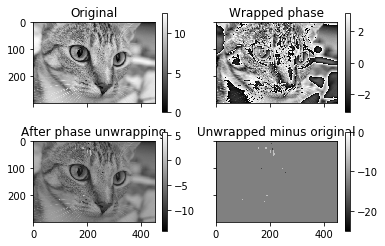

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, img_as_float, color, exposure
from skimage.restoration import unwrap_phase


# Load an image as a floating-point grayscale
image = color.rgb2gray(img_as_float(data.chelsea()))
# Scale the image to [0, 4*pi]
image = exposure.rescale_intensity(image, out_range=(0, 4 * np.pi))
# Create a phase-wrapped image in the interval [-pi, pi)
image_wrapped = np.angle(np.exp(1j * image))
# Perform phase unwrapping
image_unwrapped = unwrap_phase(image_wrapped)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = ax.ravel()

fig.colorbar(ax1.imshow(image, cmap='gray', vmin=0, vmax=4 * np.pi), ax=ax1)
ax1.set_title('Original')

fig.colorbar(ax2.imshow(image_wrapped, cmap='gray', vmin=-np.pi, vmax=np.pi),
             ax=ax2)
ax2.set_title('Wrapped phase')

fig.colorbar(ax3.imshow(image_unwrapped, cmap='gray'), ax=ax3)
ax3.set_title('After phase unwrapping')

fig.colorbar(ax4.imshow(image_unwrapped - image, cmap='gray'), ax=ax4)
ax4.set_title('Unwrapped minus original')


### non-local means denoising - for preserving textures

estimated noise standard deviation = 0.07819577897468453
PSNR (noisy) = 22.16
PSNR (slow) = 29.42
PSNR (slow, using sigma) = 29.80
PSNR (fast) = 28.41
PSNR (fast, using sigma) = 29.27


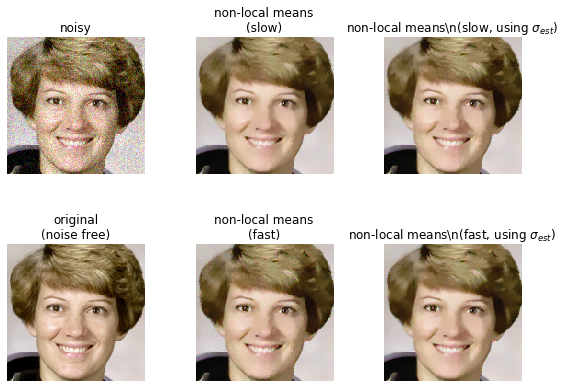

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import random_noise


astro = img_as_float(data.astronaut())
astro = astro[30:180, 150:300]

sigma = 0.08
noisy = random_noise(astro, var=sigma**2)

# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(noisy, multichannel=True))
print(f"estimated noise standard deviation = {sigma_est}")

patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6,  # 13x13 search area
                multichannel=True)

# slow algorithm
denoise = denoise_nl_means(noisy, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)

# slow algorithm, sigma provided
denoise2 = denoise_nl_means(noisy, h=0.8 * sigma_est, sigma=sigma_est,
                            fast_mode=False, **patch_kw)

# fast algorithm
denoise_fast = denoise_nl_means(noisy, h=0.8 * sigma_est, fast_mode=True,
                                **patch_kw)

# fast algorithm, sigma provided
denoise2_fast = denoise_nl_means(noisy, h=0.6 * sigma_est, sigma=sigma_est,
                                 fast_mode=True, **patch_kw)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6),
                       sharex=True, sharey=True)

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('noisy')
ax[0, 1].imshow(denoise)
ax[0, 1].axis('off')
ax[0, 1].set_title('non-local means\n(slow)')
ax[0, 2].imshow(denoise2)
ax[0, 2].axis('off')
ax[0, 2].set_title(r'non-local means\n(slow, using $\sigma_{est}$)')
ax[1, 0].imshow(astro)
ax[1, 0].axis('off')
ax[1, 0].set_title('original\n(noise free)')
ax[1, 1].imshow(denoise_fast)
ax[1, 1].axis('off')
ax[1, 1].set_title('non-local means\n(fast)')
ax[1, 2].imshow(denoise2_fast)
ax[1, 2].axis('off')
ax[1, 2].set_title(r'non-local means\n(fast, using $\sigma_{est}$)')

fig.tight_layout()

# print PSNR metric for each case
psnr_noisy = peak_signal_noise_ratio(astro, noisy)
psnr = peak_signal_noise_ratio(astro, denoise)
psnr2 = peak_signal_noise_ratio(astro, denoise2)
psnr_fast = peak_signal_noise_ratio(astro, denoise_fast)
psnr2_fast = peak_signal_noise_ratio(astro, denoise2_fast)

print(f"PSNR (noisy) = {psnr_noisy:0.2f}")
print(f"PSNR (slow) = {psnr:0.2f}")
print(f"PSNR (slow, using sigma) = {psnr2:0.2f}")
print(f"PSNR (fast) = {psnr_fast:0.2f}")
print(f"PSNR (fast, using sigma) = {psnr2_fast:0.2f}")

plt.show()


### attribute operators

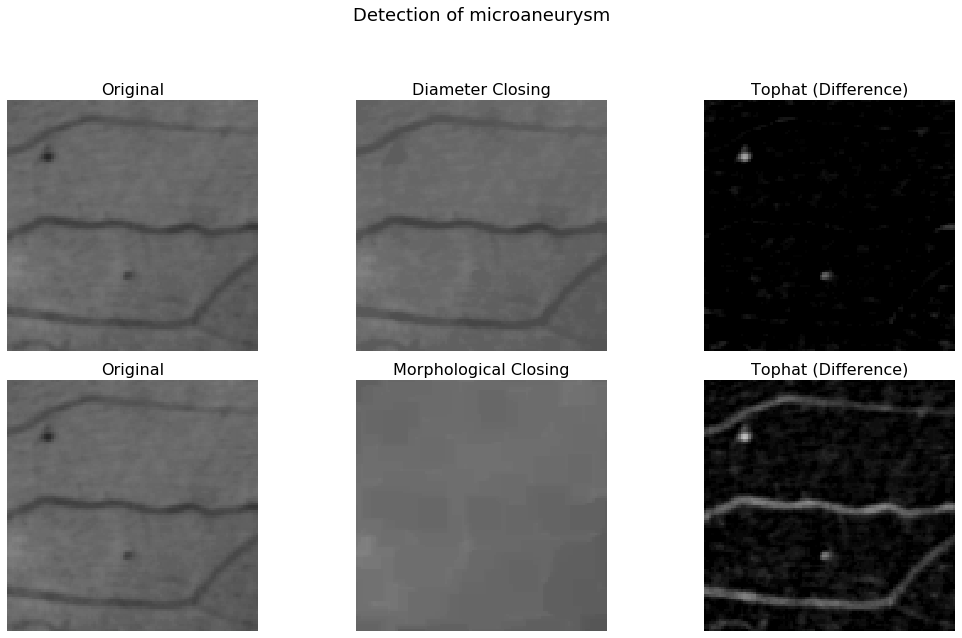

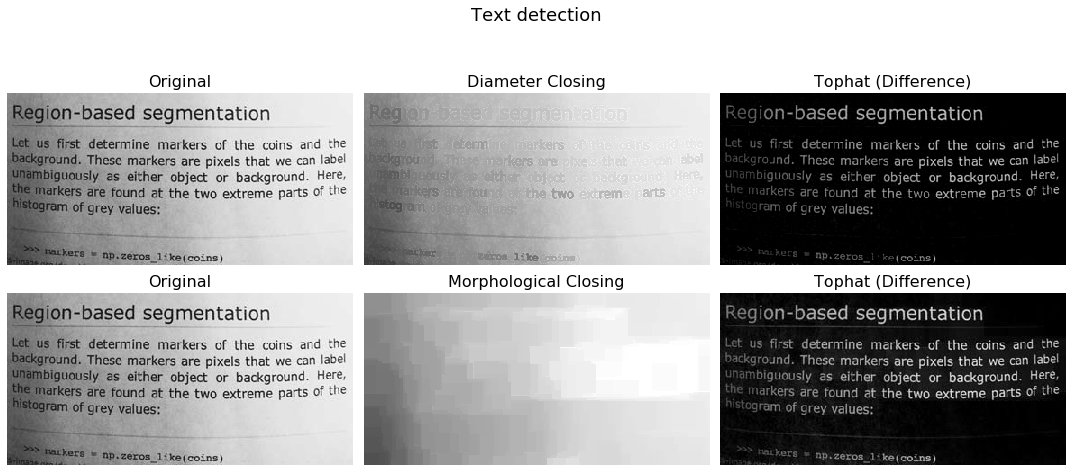

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import diameter_closing
from skimage import data
from skimage.morphology import closing
from skimage.morphology import square

datasets = {
    'retina': {'image': data.microaneurysms(),
               'figsize': (15, 9),
               'diameter': 10,
               'vis_factor': 3,
               'title': 'Detection of microaneurysm'},
    'page': {'image': data.page(),
             'figsize': (15, 7),
             'diameter': 23,
             'vis_factor': 1,
             'title': 'Text detection'}
}

for dataset in datasets.values():
    # image with printed letters
    image = dataset['image']
    figsize = dataset['figsize']
    diameter = dataset['diameter']

    fig, ax = plt.subplots(2, 3, figsize=figsize)
    # Original image
    ax[0, 0].imshow(image, cmap='gray', aspect='equal',
                    vmin=0, vmax=255)
    ax[0, 0].set_title('Original', fontsize=16)
    ax[0, 0].axis('off')

    ax[1, 0].imshow(image, cmap='gray', aspect='equal',
                    vmin=0, vmax=255)
    ax[1, 0].set_title('Original', fontsize=16)
    ax[1, 0].axis('off')

    # Diameter closing : we remove all dark structures with a maximal
    # extension of less than <diameter> (12 or 23). I.e. in closed_attr, all
    # local minima have at least a maximal extension of <diameter>.
    closed_attr = diameter_closing(image, diameter, connectivity=2)

    # We then calculate the difference to the original image.
    tophat_attr = closed_attr - image

    ax[0, 1].imshow(closed_attr, cmap='gray', aspect='equal',
                    vmin=0, vmax=255)
    ax[0, 1].set_title('Diameter Closing', fontsize=16)
    ax[0, 1].axis('off')

    ax[0, 2].imshow(dataset['vis_factor'] * tophat_attr, cmap='gray',
                    aspect='equal', vmin=0, vmax=255)
    ax[0, 2].set_title('Tophat (Difference)', fontsize=16)
    ax[0, 2].axis('off')

    # A morphological closing removes all dark structures that cannot
    # contain a structuring element of a certain size.
    closed = closing(image, square(diameter))

    # Again we calculate the difference to the original image.
    tophat = closed - image

    ax[1, 1].imshow(closed, cmap='gray', aspect='equal',
                    vmin=0, vmax=255)
    ax[1, 1].set_title('Morphological Closing', fontsize=16)
    ax[1, 1].axis('off')

    ax[1, 2].imshow(dataset['vis_factor'] * tophat, cmap='gray',
                    aspect='equal', vmin=0, vmax=255)
    ax[1, 2].set_title('Tophat (Difference)', fontsize=16)
    ax[1, 2].axis('off')
    fig.suptitle(dataset['title'], fontsize=18)
    fig.tight_layout(rect=(0, 0, 1, 0.88))

plt.show()


### wavelet denoising

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Estimated Gaussian noise standard deviation = 0.11790528153312078


/home/bjpcjp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


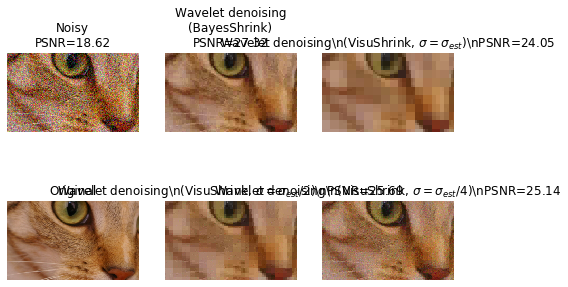

In [17]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio


original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.12
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f"Estimated Gaussian noise standard deviation = {sigma_est}")

im_bayes = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)
im_visushrink = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                method='VisuShrink', mode='soft',
                                sigma=sigma_est, rescale_sigma=True)

# VisuShrink is designed to eliminate noise with high probability, but this
# results in a visually over-smooth appearance.  Repeat, specifying a reduction
# in the threshold by factors of 2 and 4.
im_visushrink2 = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/2, rescale_sigma=True)
im_visushrink4 = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/4, rescale_sigma=True)

# Compute PSNR as an indication of image quality
psnr_noisy = peak_signal_noise_ratio(original, noisy)
psnr_bayes = peak_signal_noise_ratio(original, im_bayes)
psnr_visushrink = peak_signal_noise_ratio(original, im_visushrink)
psnr_visushrink2 = peak_signal_noise_ratio(original, im_visushrink2)
psnr_visushrink4 = peak_signal_noise_ratio(original, im_visushrink4)

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy\nPSNR={:0.4g}'.format(psnr_noisy))
ax[0, 1].imshow(im_bayes)
ax[0, 1].axis('off')
ax[0, 1].set_title(
    'Wavelet denoising\n(BayesShrink)\nPSNR={:0.4g}'.format(psnr_bayes))
ax[0, 2].imshow(im_visushrink)
ax[0, 2].axis('off')
ax[0, 2].set_title(
    (r'Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}$)\n'
     'PSNR=%0.4g' % psnr_visushrink))
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')
ax[1, 1].imshow(im_visushrink2)
ax[1, 1].axis('off')
ax[1, 1].set_title(
    (r'Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}/2$)\n'
     'PSNR=%0.4g' % psnr_visushrink2))
ax[1, 2].imshow(im_visushrink4)
ax[1, 2].axis('off')
ax[1, 2].set_title(
    (r'Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}/4$)\n'
     'PSNR=%0.4g' % psnr_visushrink4))
fig.tight_layout()

plt.show()
